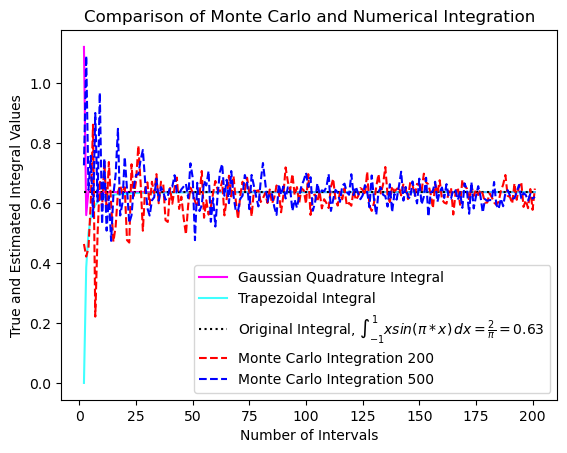

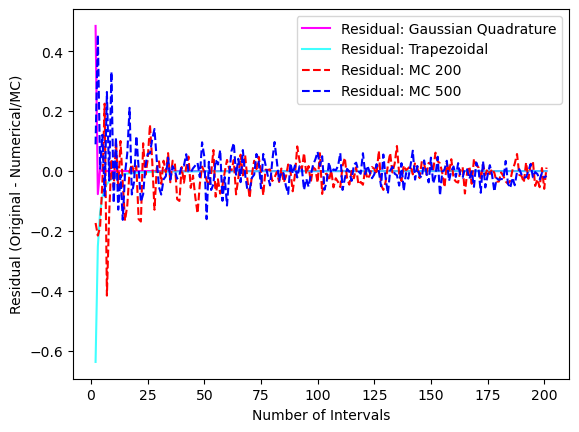

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

lower_limit = -1
upper_limit = 1
n1, n2 = [], []


def f(x):
    return x*np.sin(np.pi*x)
    


for i, j in zip(range(200), range(500)):
    n1.append(int(i + 2))
    n2.append(int(j + 2))
    

MC_integral_200, MC_integral_500 = [], []
trapezoidal_integral = []
quadrature_integral = [] 
original_integral = [] 



for i, j in zip(n1, n2):
    h1 = (upper_limit - lower_limit)/float(i)
    h2 = (upper_limit - lower_limit)/float(j)
    
    trap = 0.5*(f(upper_limit) + f(lower_limit))
    
    for k in range(i):
        trap += f(lower_limit + k*h1)
    trapezoidal_integral.append(h1*trap)

    quad, difference = integrate.fixed_quad(f, lower_limit, upper_limit , n = i)
    quadrature_integral.append(quad)
    
    
    xrand1 = np.random.uniform(lower_limit, upper_limit, i)
    xrand2 = np.random.uniform(lower_limit, upper_limit, j)
    integral1 = 0
    integral2 = 0
    
    for m, n in zip(range(i), range(j)):
        integral1 += f(xrand1[m])
        integral2 += f(xrand2[n])
    MC_integral_200.append(h1*integral1)
    MC_integral_500.append(h2*integral2)



fig, ax1 = plt.subplots()

ax1.plot(n1, quadrature_integral, label = 'Gaussian Quadrature Integral', color = 'magenta')
ax1.plot(n1, trapezoidal_integral, label = 'Trapezoidal Integral', color = 'cyan', alpha = 0.75)
ax1.plot(n1, [2/np.pi]*len(n1), linestyle = 'dotted', label = r'Original Integral, $\int_{-1}^{1} xsin(\pi*x)\,dx = \frac{2}{\pi} = 0.63$', color = 'black')
ax1.plot(n1, MC_integral_200, linestyle = 'dashed', label = 'Monte Carlo Integration 200', color = 'red')
ax1.plot(n2, MC_integral_500, linestyle = 'dashed', label = 'Monte Carlo Integration 500', color = 'blue')


plt.xlabel('Number of Intervals')
plt.ylabel('True and Estimated Integral Values')
plt.legend()
plt.title('Comparison of Monte Carlo and Numerical Integration')   
plt.savefig('HW7_MC_Integration.pdf')
plt.show()


plt.plot(n1, np.asarray(quadrature_integral) - np.asarray([2/np.pi]*len(n1)), label = 'Residual: Gaussian Quadrature', color = 'magenta')
plt.plot(n1, np.asarray(trapezoidal_integral) - np.asarray([2/np.pi]*len(n1)), label = 'Residual: Trapezoidal', color = 'cyan', alpha = 0.75)
plt.plot(n1, np.asarray(MC_integral_200) - np.asarray([2/np.pi]*len(n1)), linestyle = 'dashed', label = 'Residual: MC 200', color = 'red')
plt.plot(n2, np.asarray(MC_integral_500) - np.asarray([2/np.pi]*len(n2)), linestyle = 'dashed', label = 'Residual: MC 500', color = 'blue')
plt.xlabel('Number of Intervals')
plt.ylabel('Residual (Original - Numerical/MC)')
plt.legend()
plt.savefig('HW7_Residual_Plot.pdf')
plt.show()